<a href="https://colab.research.google.com/github/MadmanMarble/GLAP/blob/main/Amanda_Lambert_Final_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv8
##A cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions
See more here: [Ultralytics YOLOv8 site](https://github.com/ultralytics/ultralytics)

Another resource is from [OpenCV](https://learnopencv.com/ultralytics-yolov8/)

Features:
* User-friendly API (Command Line + Python).
* Faster and More Accurate.
* Supports: Object Detection, Instance Segmentation, Image Classification.

There are five models in each category of YOLOv8 models for detection, segmentation, and classification. YOLOv8 Nano is the fastest and smallest, while YOLOv8 Extra Large (YOLOv8x) is the most accurate yet the slowest among them.

* YOLOv8n
* YOLOv8s
* YOLOv8m
* YOLOv8l
* YOLOv8x

In [1]:
# Install the necessary packages
!pip install ultralytics
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.3/873.3 kB 14.1 MB/s eta 0:00:00


##Upload image, perform object detection on image and count objects belonging to certain classes

In [2]:
# we are using a trained model to do our object detection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving istockphoto-669989184-1024x1024.jpg to istockphoto-669989184-1024x1024 (6).jpg

image 1/1 /content/istockphoto-669989184-1024x1024 (6).jpg: 640x448 6 persons, 12 cars, 4 buss, 1 truck, 1 chair, 169.4ms
Speed: 4.7ms preprocess, 169.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Car 1: x1=548.1277465820312, y1=434.37689208984375, x2=683.0, y2=564.0136108398438
Car 2: x1=512.451904296875, y1=341.22894287109375, x2=653.7213134765625, y2=482.2416076660156
Car 3: x1=576.7986450195312, y1=531.9259643554688, x2=682.8767700195312, y2=642.9595947265625
Car 4: x1=114.67598724365234, y1=493.97412109375, x2=280.2142639160156, y2=620.65576171875
Car 5: x1=491.8094787597656, y1=687.3367919921875, x2=682.2537841796875, y2=955.7547607421875
Car 6: x1=336.0414733886719, y1=334.91058349609375, x2=536.1536254882812, y2=626.3382568359375
Car 7: x1=314.91064453125, y1=131.4556884765625, x2=391.70965576171875, y2=211.49679565429688
Car 8: x1=483.41925048828125, y1=310.97418212890

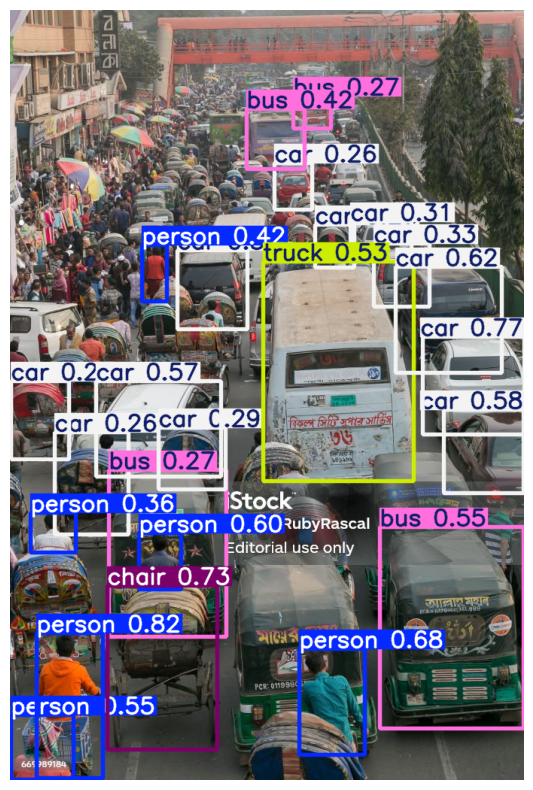

In [20]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # for image display in Colab

# Load the pre-trained YOLOv8 model
# This is the bit that's doing all the work
model = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt', 'yolov8m.pt', etc., for better accuracy but slower speed

# Upload an image from your local machine
from google.colab import files
uploaded = files.upload()

# Get the uploaded image path
image_path = list(uploaded.keys())[0]

# Perform object detection
results = model(image_path)

# Load image for display purposes
image = cv2.imread(image_path)

# COCO class IDs: person (0), vehicles (car-2, bus-5, truck-7)
car_class_ids = [2, 5, 7]  # COCO IDs for car, bus, truck (vehicles)
person_class_id = 0  # COCO ID for person

# Count cars and people
car_count = 0
person_count = 0
STEREO_OUTPUT_FORMAT_DISPARITY_FIXED16_12_4 = 0
sum_y = 0
sum_x = 0
car_count = 0

for result in results:
    for box in result.boxes:
        class_id = int(box.cls)
        if class_id == person_class_id:
            person_count += 1
        elif class_id in car_class_ids:
            car_count += 1
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get bounding box coordinates

            # Print the bounding box coordinates
            print(f"Car {car_count}: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

            # Calculate center of the bounding box
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2

            # Sum the centers' x and y coordinates
            sum_x += center_x
            sum_y += center_y

# Print the counts
# print(f'Number of people detected: {person_count}')
print(f'Number of cars (vehicles) detected: {car_count}')

# Compute average center coordinates if any cars were detected
if car_count > 0:
    avg_x = sum_x / car_count
    avg_y = sum_y / car_count
    print(f'Average x-coordinate of car centers: {avg_x}')
    print(f'Average y-coordinate of car centers: {avg_y}')
else:
    print("No cars detected.")

# Annotate and display the image with detections
annotated_image = results[0].plot()

# Convert image from BGR (OpenCV) to RGB (Matplotlib)
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')  # Hide axis
plt.show()


In [19]:
# Compute average center coordinates if any cars were detected
if car_count > 0:
    avg_x = sum_x / car_count
    avg_y = sum_y / car_count
    print(f'Average x-coordinate of car centers: {avg_x}')
    print(f'Average y-coordinate of car centers: {avg_y}')
else:
    print("No cars detected.")

Average x-coordinate of car centers: 381.96617395737593
Average y-coordinate of car centers: 455.3193170884076


In [16]:
print(x1, y1, x2, y2)

351.85773 203.35757 401.4044 265.6057


In [17]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

#Assigned Task


Compute the average x-coordinate and average y-coordinate of centers of all bounding boxes of objects from a certain class like "cars" in the image. Print those average numbers. Hint: the line of code below gives points on the bounding box:

**x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()**



In [ ]:
# pick any object class
# print those numbers
# the line of code is a hint
# the box.xyxy[0] is giving you a list of 4 numbers.
# the 4 numebrs have to be converted to a list of numbers that's usefull to me
# what comes out is a set of 4 numbers
# coord of top left and right bottom vertex
# how would you get the center of the box. 1 hr 36 min
# for each box in results of the for loop..... ?
# += means incriment the variable by one.
# you can do this code (provided above)
# get x1 x2 y1 y2 from the box, compute the center of the box.
# then you have to create an average of all the centers. why?
# bc these are improtant in traffic tracking applications.
# DOT is interested in using AI to count cars, avg num of cars on a road, street.
# bc this can tell you how much congestion there is
# this is the only task
# print the avg of all bounding boxes of any class: cars, keyboards


In [ ]:
# divide the cumuliative mubers by the count????
car_count = 0 # example
person_count = 0 # example
# the export will be 2 numbers. all of the averages of the x coords
# all of the average of the y coord
# you can extract the smallest size bounding box in terms of pixel areas
# based on that you can print/find the smalles (would correspond to the smalles car in the image)
# not smallest car, but smalles car in the image.
# that's another more advanced level of the problem
#
